I am using bio-yeast-protein-inter network  
https://networkrepository.com/bio-yeast-protein-inter.php

In [ ]:


import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


In [ ]:
import networkx as nx

# Load edge list with weights
G = nx.read_edgelist("/content/bio-yeast-protein-inter.edges", nodetype=int, data=(("weight", float),))


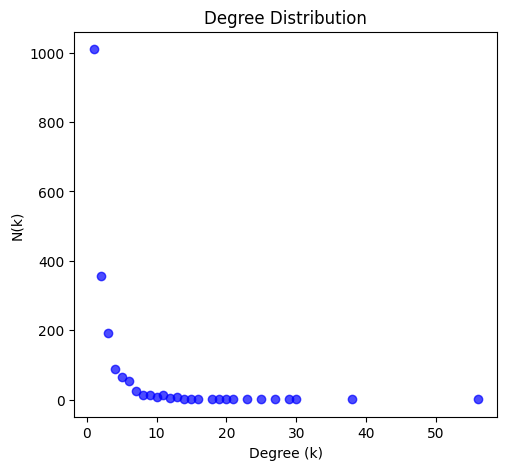

In [ ]:

# Compute degree distribution
degree_sequence = [d for n, d in G.degree()]
degree_count = np.bincount(degree_sequence)  # Counts occurrences of each degree
k_values = np.nonzero(degree_count)[0]  # Nonzero degree values
N_k = degree_count[k_values]  # Frequency of each degree

#Plot Degree Distribution (N(k) vs k)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(k_values, N_k, color="blue", alpha=0.7)
plt.xlabel("Degree (k)")
plt.ylabel("N(k)")
plt.title("Degree Distribution")
plt.xscale("linear")
plt.yscale("linear")

Text(0.5, 1.0, 'Log-Log Degree Distribution')

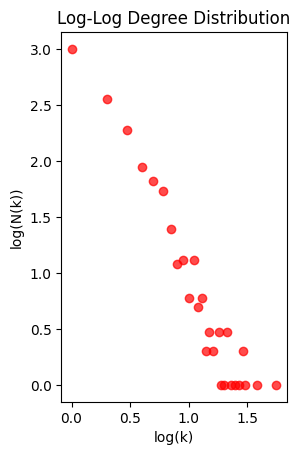

In [ ]:
#Log-Log plot of Degree Distribution
log_k = np.log10(k_values)
log_N_k = np.log10(N_k)

plt.subplot(1, 2, 2)
plt.scatter(log_k, log_N_k, color="red", alpha=0.7)
plt.xlabel("log(k)")
plt.ylabel("log(N(k))")
plt.title("Log-Log Degree Distribution")

In [ ]:
# Compute Spearman correlation coefficient
spearman_corr, _ = stats.spearmanr(log_k, log_N_k)
print(f"Spearman Correlation Coefficient: {spearman_corr:.4f}")


Spearman Correlation Coefficient: -0.9440


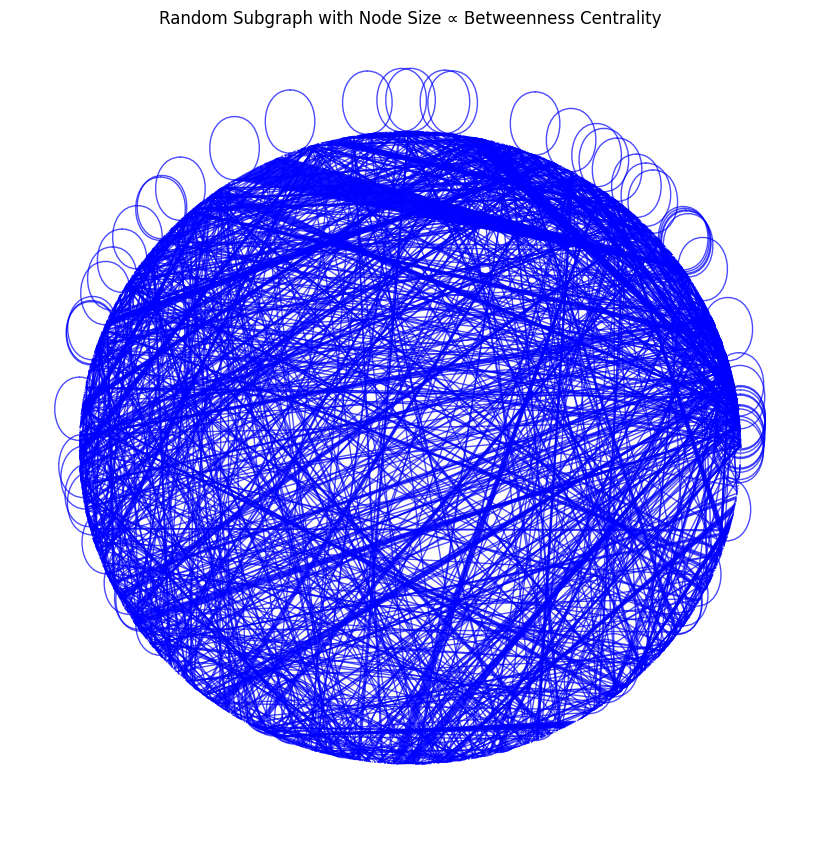

In [ ]:
import random

# Sample a random subset of nodes (10% of nodes in G)
num_nodes_to_sample = int(1 * len(G.nodes()))  # 100% of nodes
sampled_nodes = random.sample(list(G.nodes()), num_nodes_to_sample)  # Convert to list

# Create a subgraph using the sampled nodes
H = G.subgraph(sampled_nodes)

# Compute betweenness centrality for the subgraph
betweenness = nx.betweenness_centrality(H,)
node_size = [int(0.1 * (betweenness[n]**2)) for n in H.nodes()]  # Scale node size by betweenness
# Extract node sizes from betweenness centrality
node_sizes = [betweenness.get(node, 0) * 10000000 for node in G.nodes()]
node_sizes = [int(i)for i in node_sizes ]
# Visualize the subgraph
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(H)   # Layout for subgraph
nx.draw(H, pos, with_labels=False, node_size=node_size, edge_color="blue", alpha=0.7)
plt.title("Random Subgraph with Node Size ∝ Betweenness Centrality")
plt.show()


In [ ]:
import random
import networkx as nx
import plotly.graph_objects as go

# Sample a random subset of nodes (60% of nodes in G)
num_nodes_to_sample = int(0.6 * len(G.nodes()))  # 60% of nodes
sampled_nodes = random.sample(list(G.nodes()), num_nodes_to_sample)  # Convert to list

# Create a subgraph using the sampled nodes
H = G.subgraph(sampled_nodes)

# Compute betweenness centrality for the subgraph
betweenness = nx.betweenness_centrality(H)

# Scale node size by betweenness and ensure sizes are integers
node_size = [int(100 * (betweenness[n] ** 2)) for n in H.nodes()]  # Convert to integer

# Get positions for nodes
pos = nx.spring_layout(H)

# Extract node and edge coordinates
edge_x = []
edge_y = []
for edge in H.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_y.append(y0)
    edge_x.append(x1)
    edge_y.append(y1)

# Create edge trace
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='blue'),
    hoverinfo='none',
    mode='lines'
)

# Create node trace
node_x = []
node_y = []
node_text = []
for node in H.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"Node {node}: Betweenness = {betweenness[node]:.4f}")

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=node_size,
        colorbar=dict(thickness=15, title='Node Size', xanchor='left', titleside='right')
    )
)

# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Random Subgraph with Node Size ∝ Betweenness Centrality',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

# Show plot
fig.show()

